## Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading mnist

In [3]:
mnist = tf.keras.datasets.mnist
print("loading")
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("loaded")
x_train, x_test = x_train/255.0, x_test/255.0 
x_train=np.expand_dims(x_train, axis=3) 
x_test=np.expand_dims (x_test, axis=3)
print("done")

loading
loaded
preparing model


## Model & settings

In [4]:
plt.ioff()
mnist = tf.keras.datasets.mnist
print("loading")
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("loaded")
x_train, x_test = x_train/255.0, x_test/255.0 
x_train=np.expand_dims(x_train, axis=3) 
x_test=np.expand_dims (x_test, axis=3)
print("preparing model")
model = tf.keras.models.Sequential([ 
tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=x_train[0].shape, activation='relu'), 
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'), 
tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
tf.keras.layers.Dropout(0.3), 
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.Dropout(0.25), 
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation=tf.nn.relu), 
tf.keras.layers.BatchNormalization(), 
tf.keras.layers.Dropout(0.25), 
tf.keras.layers.Dense(10, activation=tf.nn.softmax), 
]) 
print("compiling")
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
loss=tf.keras.losses.sparse_categorical_crossentropy, 
metrics=['accuracy']) 
print("compilation end")

loading
loaded


W1024 12:54:44.816387 42760 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


preparing model
compiling
compilation end


## Load model

In [5]:
model = tf.keras.models.load_model('./models/compiled_mnist.h5')

W1024 12:56:43.831404 42760 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1024 12:56:43.834396 42760 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1024 12:56:44.159922 42760 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is de

## Visualization

In [61]:
def show_layers(image_num=1111, layer_num=0):
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = tf.keras.Model(inputs = model.input, outputs = layer_outputs)

    test_im = x_train[image_num]
    activations = activation_model.predict(test_im.reshape(1,28,28,1))

    first_layer_activation = activations[layer_num]

    for i in range(first_layer_activation.shape[-1]):
        plt.title('Conv layer %s, image %s,\nfilter #%s' % (layer_num, image_num, i))
        plt.imshow(first_layer_activation[0,:,:,i])
        plt.show()


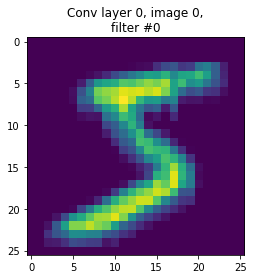

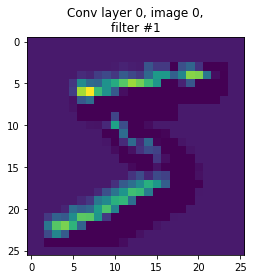

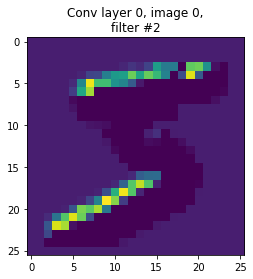

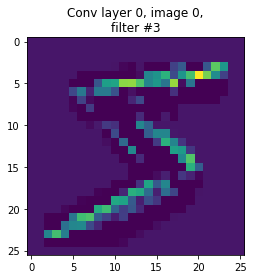

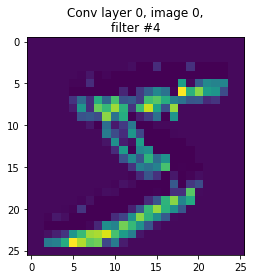

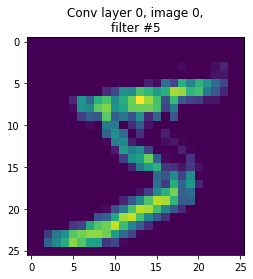

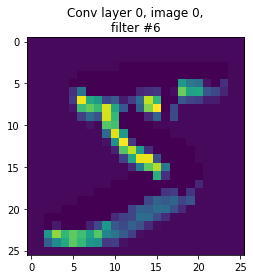

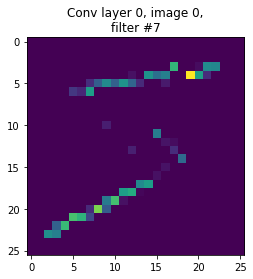

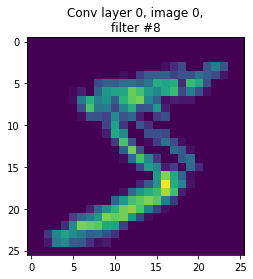

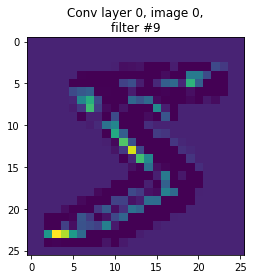

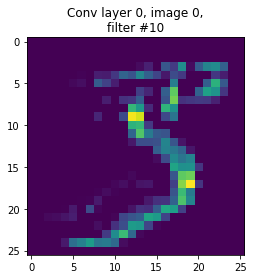

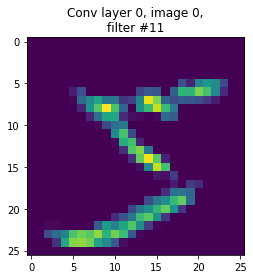

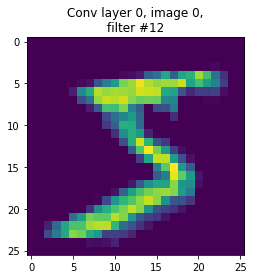

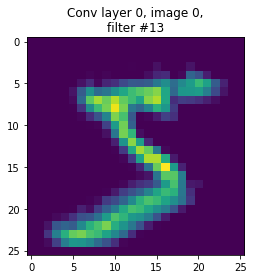

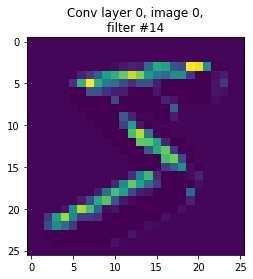

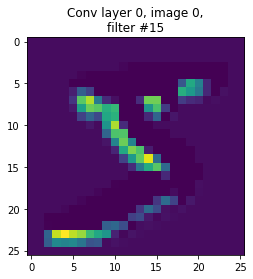

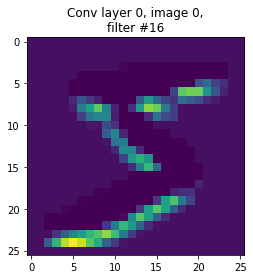

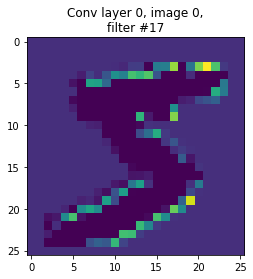

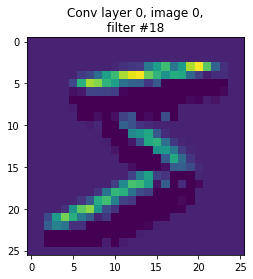

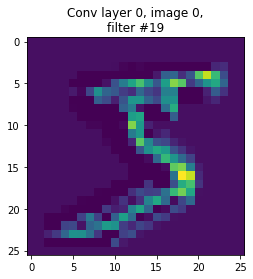

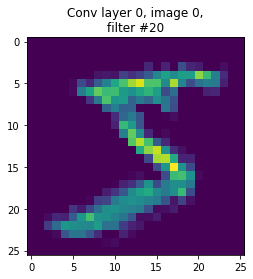

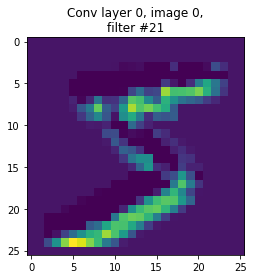

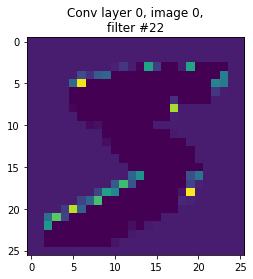

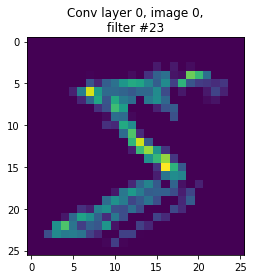

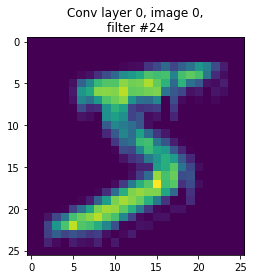

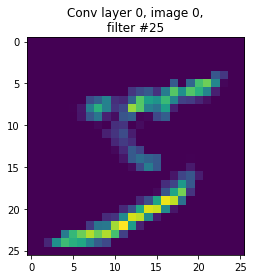

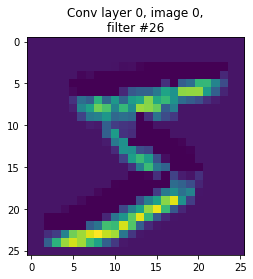

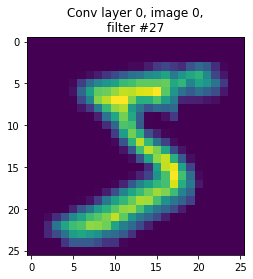

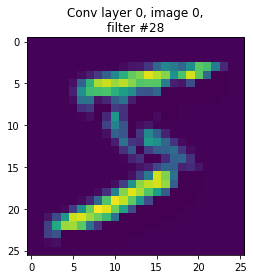

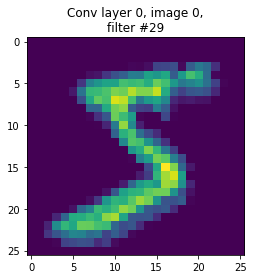

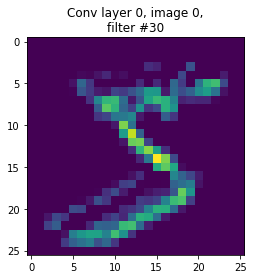

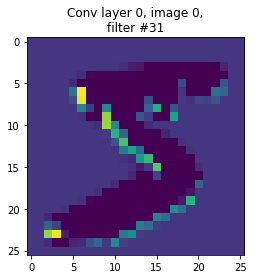

In [62]:
show_layers(image_num=0)